# Exploring Movie Data

Exploring and visualizing movie data scraped from Box Office Mojo. Make sure to format your plots properly with axis labels and graph titles at the very least.

-------

 ### Data Prep
 
- Import in the standard libraries (NumPy, pandas, matplotlib)
- Read in the CSV
- Explore the data set, the columns and the types

In [110]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from ggplot import diamonds
matplotlib.style.use('ggplot')   

moviedata = pd.read_csv('2013_movies.csv')
moviedata.shape

(100, 7)

In [27]:
moviedata.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')

In [28]:
moviedata.dtypes

Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
dtype: object

In [29]:
moviedata.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


### Exercise 1 
 
- Plot Domestic Total Gross over Time.
- Try a scatterplot and a line plot.

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


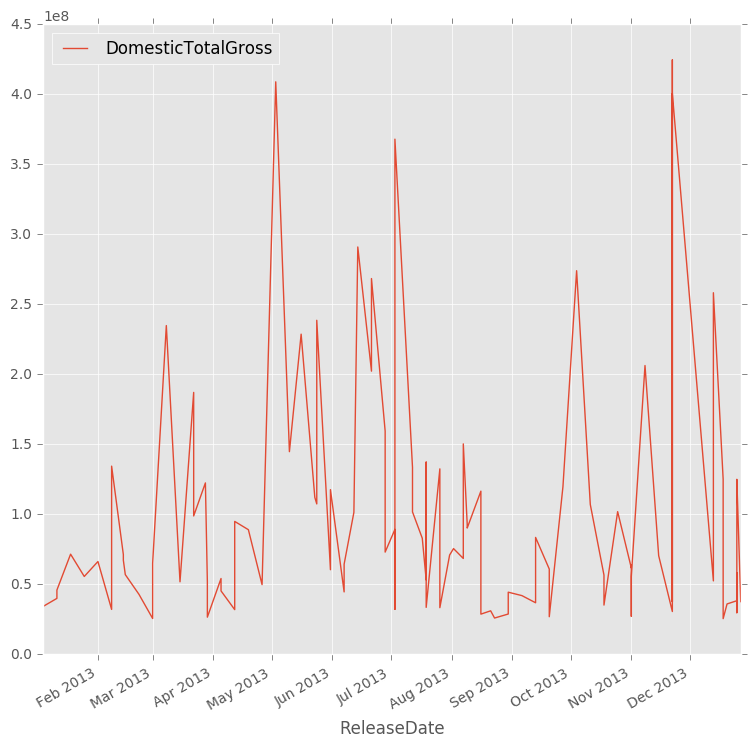

In [35]:
moviedata['ReleaseDate'] = pd.to_datetime(moviedata['ReleaseDate'])
timesortedmoviedata = moviedata.sort('ReleaseDate',ascending=True)
timesortedmoviedata.plot(x="ReleaseDate",
             y="DomesticTotalGross",
             figsize=(9,9))

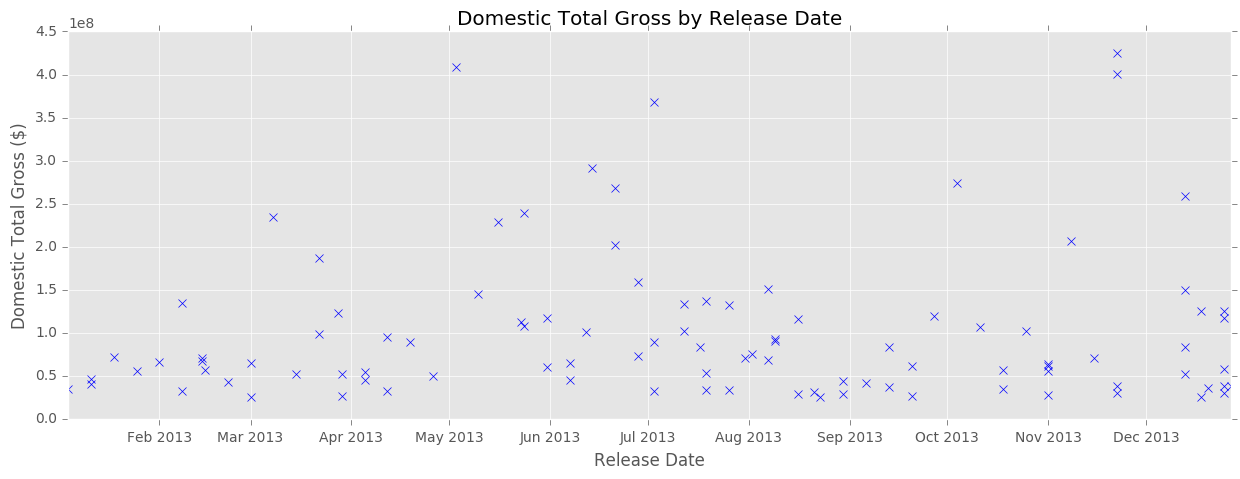

In [33]:
fig = plt.figure(figsize=(15,5))
plt.plot(timesortedmoviedata['ReleaseDate'],timesortedmoviedata['DomesticTotalGross'],'bx')
plt.title('Domestic Total Gross by Release Date')
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross ($)')

### Exercise 2

- Plot Runtime vs. Domestic Total Gross. 
- Try a scatterplot and a line plot.

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


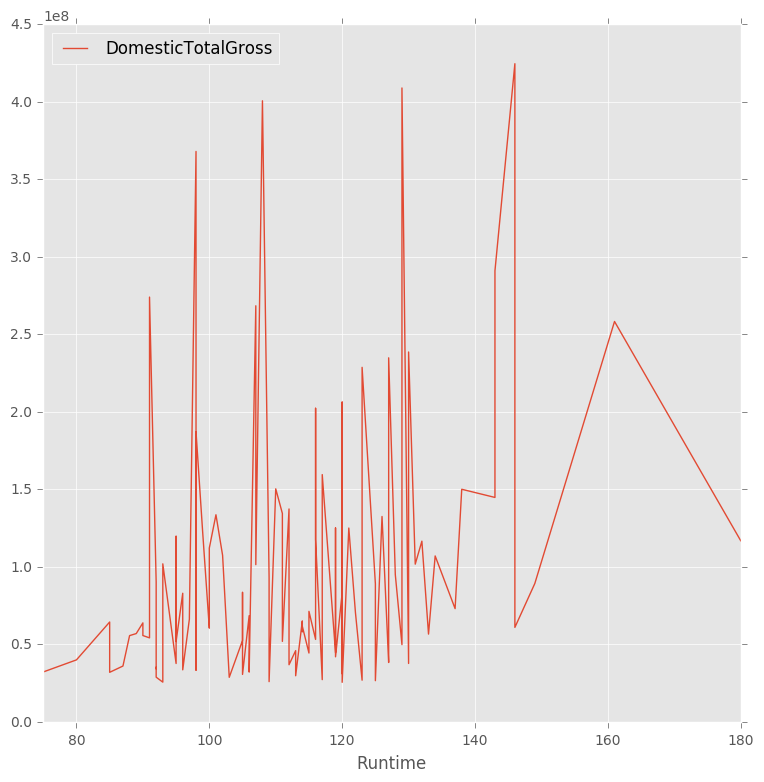

In [39]:
runtimesortedmoviedata = moviedata.sort('Runtime',ascending=True)
runtimesortedmoviedata.plot(x="Runtime",
             y="DomesticTotalGross",
             figsize=(9,9))

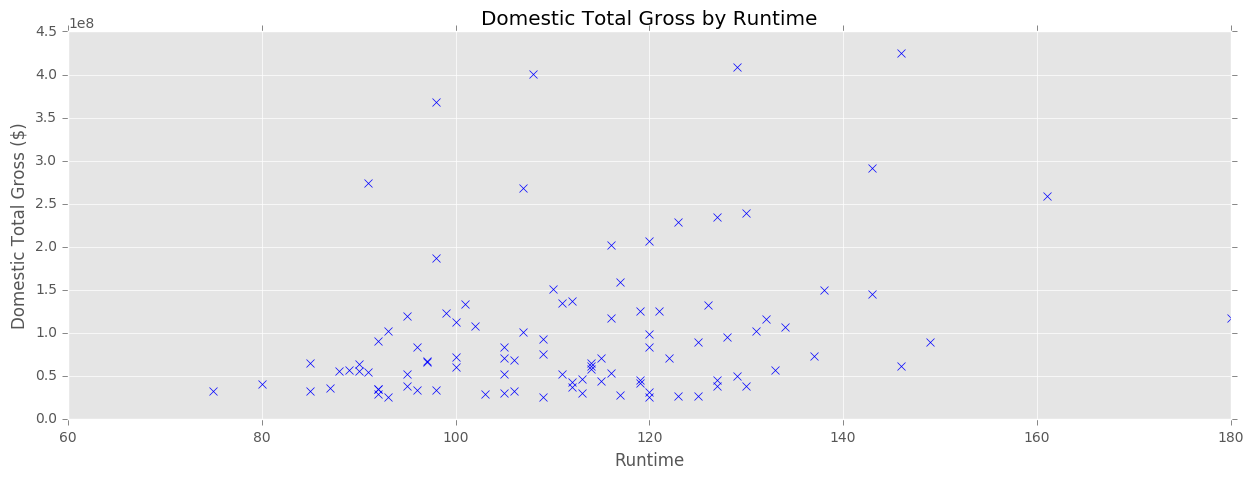

In [38]:
fig = plt.figure(figsize=(15,5))
plt.plot(grosssortedmoviedata['Runtime'],grosssortedmoviedata['DomesticTotalGross'],'bx')
plt.title('Domestic Total Gross by Runtime')
plt.xlabel('Runtime')
plt.ylabel('Domestic Total Gross ($)')

### Exercise 3

- Group your data by Rating.
- Find the average runtime and domestic total gross at each level of Rating.

In [77]:
moviedata['Rating'].value_counts()
df_rating = timesortedmoviedata.groupby('Rating')

In [48]:
pd.pivot_table(moviedata,
               aggfunc= np.mean,
               values='Runtime',
               columns=['Rating'])

Rating
G        107.000000
PG        99.933333
PG-13    117.510638
R        110.729730
Name: Runtime, dtype: float64

In [49]:
pd.pivot_table(moviedata,
               aggfunc= np.mean,
               values='DomesticTotalGross',
               columns=['Rating'])

Rating
G        268492764
PG       131135716
PG-13    111449769
R         69892429
Name: DomesticTotalGross, dtype: int64

### Exercise 4

- Plot Release Date by Domestic Total Gross. Segment by Rating.
- Have all 4 groups on one plot.
- Have 4 separate plots, but part of the same matplotlib figure.

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735040.0, right=735040.0
  'left=%s, right=%s') % (left, right))


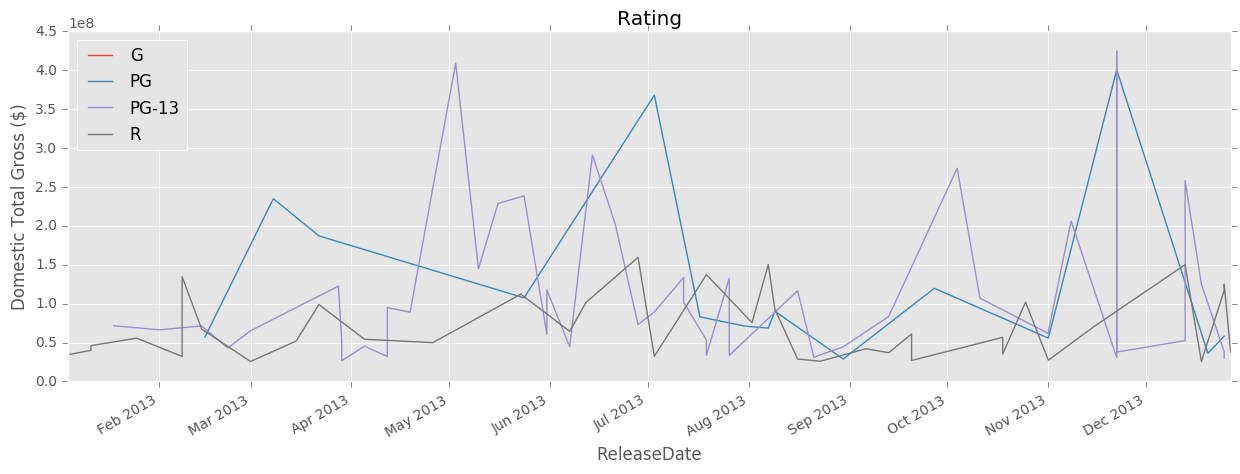

In [78]:
fig = plt.figure(figsize=(15,5))
ax = plt.gca()
labels =[]

for name, ratinggroup in df_rating:
    ratinggroup.plot(x='ReleaseDate',y='DomesticTotalGross',title='Rating',label=name, ax=ax)
    labels.append(name)
    
plt.legend(labels, loc='best')
plt.ylabel('Domestic Total Gross ($)')

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735040.0, right=735040.0
  'left=%s, right=%s') % (left, right))


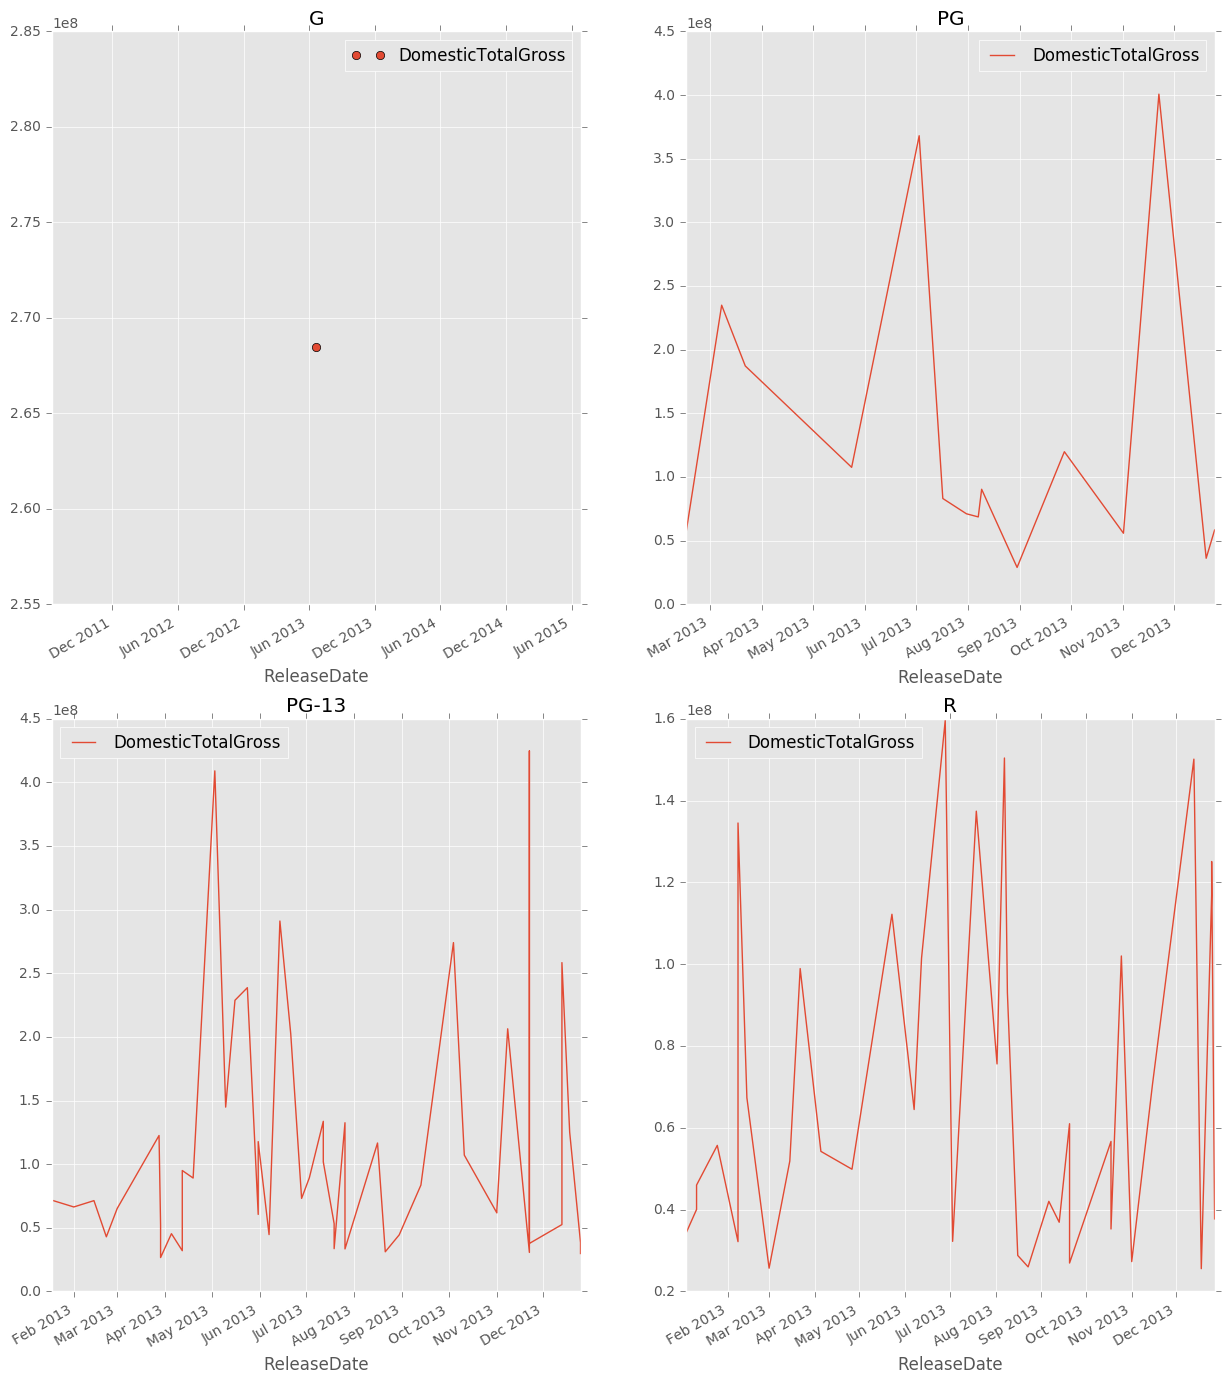

In [94]:
fig = plt.figure(figsize=(15,18))

gmovies = timesortedmoviedata[timesortedmoviedata['Rating']=='G']
pgmovies = timesortedmoviedata[timesortedmoviedata['Rating']=='PG']
pg13movies = timesortedmoviedata[timesortedmoviedata['Rating']=='PG-13']
rmovies = timesortedmoviedata[timesortedmoviedata['Rating']=='R']

plt.title('Domestic Total Gross vs. Release Date')

ax = plt.subplot(2,2,1)
gmovies.plot(x='ReleaseDate',y='DomesticTotalGross',title='G',ax=ax,style='o')

ax = plt.subplot(2,2,2)
pgmovies.plot(x='ReleaseDate',y='DomesticTotalGross',title='PG',ax=ax)

ax = plt.subplot(2,2,3)
pg13movies.plot(x='ReleaseDate',y='DomesticTotalGross',title='PG-13',ax=ax)

ax = plt.subplot(2,2,4)
rmovies.plot(x='ReleaseDate',y='DomesticTotalGross',title='R',ax=ax)

### Exercise 5

- What director in your dataset has the highest gross per movie (highest avg gross)?
- Find the top 3 directors with the highest average gross with "one-hit-wonders" removed.

In [95]:
director_gross = pd.DataFrame(pd.pivot_table(moviedata,
               aggfunc= np.mean,
               values='DomesticTotalGross',
               columns=['Director']))
director_gross.sort('DomesticTotalGross',ascending=False)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,DomesticTotalGross
Director,
Francis Lawrence,424668047
Shane Black,409013994
Chris BuckJennifer Lee,400738009
Pierre CoffinChris Renaud,368061265
Zack Snyder,291045518
Alfonso Cuaron,274092705
Dan Scanlon,268492764
Peter Jackson,258366855
Justin Lin,238679850


In [99]:
#remove directors with only one movies
director_means = moviedata.groupby('Director')['DomesticTotalGross'].agg(
    [np.count_nonzero,np.mean]).sort_values(by='mean',ascending=False)
nononehitwonders = director_means[director_means['count_nonzero']>1]
nononehitwonders.head()

,count_nonzero,mean
Director,,
James Wan,2,110493294
Tyler Perry,2,52259354
Malcolm D. Lee,2,51270491


### Exercise 6

- Bin the dataset into months and make a bar graph with error bars of gross each month

In [111]:
timesortedmoviedata['Month'] = timesortedmoviedata['ReleaseDate'].apply(lambda x: x.month)
monthdata = timesortedmoviedata.groupby('Month')
monthmeans = monthdata['DomesticTotalGross'].agg({
        'count':'count', 'mean':'mean','std':'std','sem': lambda x: np.std(x, ddof=1) / math.sqrt(len(x))
    })

monthmeans

,mean,std,count,sem
Month,,,,
1,49543237,1.465947e+07,5,6555914
2,67386013,3.283185e+07,7,12409272
3,96097096,7.323942e+07,9,24413138
4,60940719,2.530104e+07,6,10329105
5,177409720,1.117754e+08,8,39518588
6,150650005,9.519994e+07,8,33658260
7,105780721,9.140837e+07,12,26387322
8,68531263,4.132232e+07,11,12459149
9,61712314,3.482327e+07,6,14216539


([<matplotlib.axis.XTick at 0x129c2c4a8>,
 <a list of 12 Text xticklabel objects>)

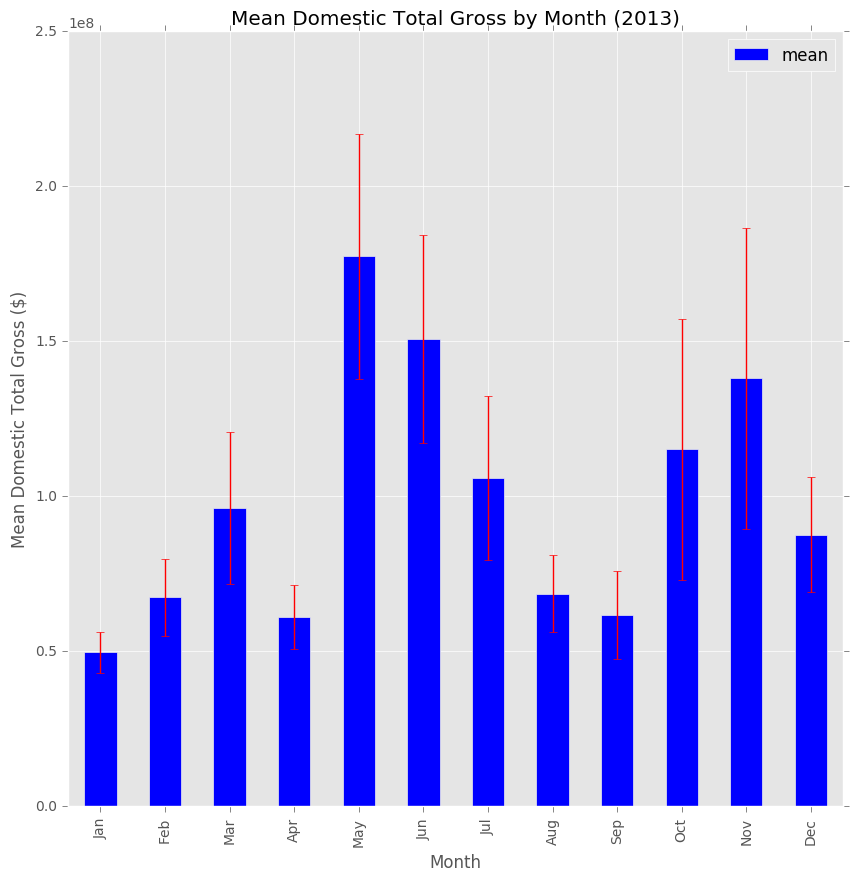

In [114]:
fig = plt.figure(figsize=(10,10))
plt.title('Mean Domestic Total Gross by Month (2013)')
ax = plt.gca()

monthmeans.plot(y='mean',kind='bar', yerr=monthmeans['sem'],ax=ax,color='b',ecolor='r')
plt.xlabel('Month')
plt.ylabel('Mean Domestic Total Gross ($)')
plt.xticks(range(12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])